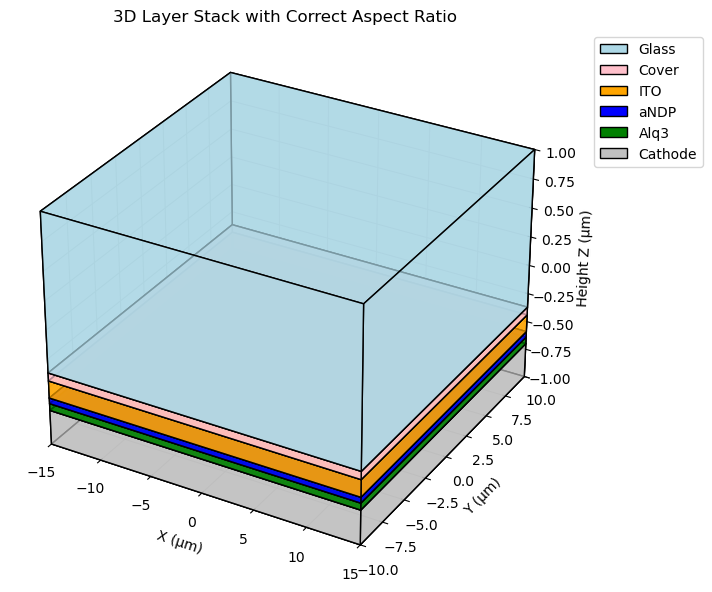

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Patch
import numpy as np

def set_axes_equal(ax):
    """Set 3D plot axes to equal scale."""
    # get current limits
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()
    # compute ranges and midpoints
    x_range = abs(x_limits[1] - x_limits[0])
    x_mid   = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_mid   = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_mid   = np.mean(z_limits)
    # use the maximum range to set all axes
    plot_radius = 0.5 * max([x_range, y_range, z_range])
    ax.set_xlim3d([x_mid - plot_radius, x_mid + plot_radius])
    ax.set_ylim3d([-10, 10])
    ax.set_zlim3d([-1, 1])

# Layer definitions: (name, thickness, center_z, color)
layers_info = [
    ("Cathode",  0.3,  -0.85, "silver"),
    ("Alq3",     0.06, -0.67, "green"),
    ("aNDP",     0.05, -0.615, "blue"),
    ("ITO",      0.15, -0.515, "orange"),
    ("Cover",    0.07, -0.405, "pink"),
    ("Glass",    1.37,  0.315, "lightblue"),
]

# Plot extents
x_min, x_max = -15, 15
y_min, y_max = -10, 10

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Create geometry
legend_patches = []
for name, thickness, center_z, color in layers_info:
    z0 = center_z - thickness/2
    z1 = center_z + thickness/2
    verts = np.array([
        [x_min, y_min, z0],
        [x_max, y_min, z0],
        [x_max, y_max, z0],
        [x_min, y_max, z0],
        [x_min, y_min, z1],
        [x_max, y_min, z1],
        [x_max, y_max, z1],
        [x_min, y_max, z1],
    ])
    faces = [
        [verts[j] for j in [0,1,2,3]],
        [verts[j] for j in [4,5,6,7]],
        [verts[j] for j in [0,1,5,4]],
        [verts[j] for j in [1,2,6,5]],
        [verts[j] for j in [2,3,7,6]],
        [verts[j] for j in [3,0,4,7]],
    ]
    poly = Poly3DCollection(faces, facecolors=color, edgecolors='k', alpha=0.7)
    ax.add_collection3d(poly)
    legend_patches.append(Patch(facecolor=color, edgecolor='k', label=name))

# Axis labels and limits
ax.set_xlabel('X (µm)')
ax.set_ylabel('Y (µm)')
ax.set_zlabel('Height Z (µm)')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
# compute z-limits from layers
zs = [center_z for _, _, center_z, _ in layers_info]
half_thicks = [thickness/2 for _, thickness, _, _ in layers_info]
z_min = min(zs) - max(half_thicks)
z_max = max(zs) + max(half_thicks)
ax.set_zlim(z_min, z_max)

# Equalize axes to get proper rectangular prism
set_axes_equal(ax)

# Legend with reversed order
legend_patches.reverse()
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('3D Layer Stack with Correct Aspect Ratio')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.tight_layout()
plt.show()
